<a href="https://colab.research.google.com/github/josephg99/hello-world/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

Loading & preparing data

In [18]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


Visualize dataset

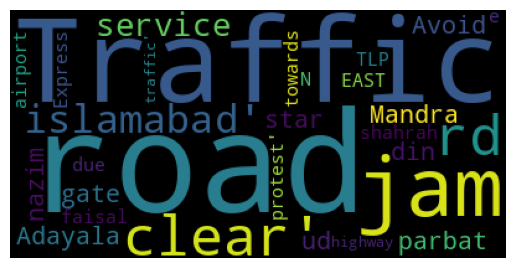

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df['Text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Data Preperation

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2109 non-null   object
 1   Sentiment  2109 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.1+ KB


In [21]:
# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1010   1008                   Traffic open at shahrah e faisal    2
1          1099   1079  Road is closed for traffic at star gate toward...    3

In [22]:
# Delete the duplicate rows
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1008   1008                              Adayala road is clear    1
1          1079   1079  Traffic jam from parbat rd to nazim-ud-din rd ...    1

# Run the models & vectorizers in a forloop to get each of the accuracy. The highest result is the best model.


Vectorizer: CountVectorizer
  Model: LogisticRegression
    Best parameters: {'C': 1}
    Accuracy: 0.9378


<Figure size 1000x800 with 0 Axes>

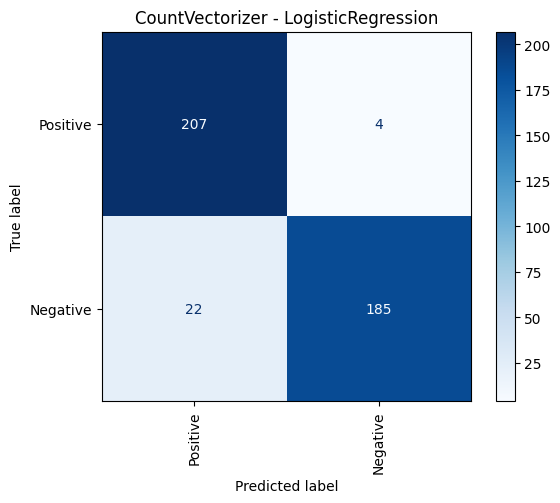

  Model: KNeighborsClassifier
    Best parameters: {'n_neighbors': 5, 'weights': 'uniform'}
    Accuracy: 0.9474


<Figure size 1000x800 with 0 Axes>

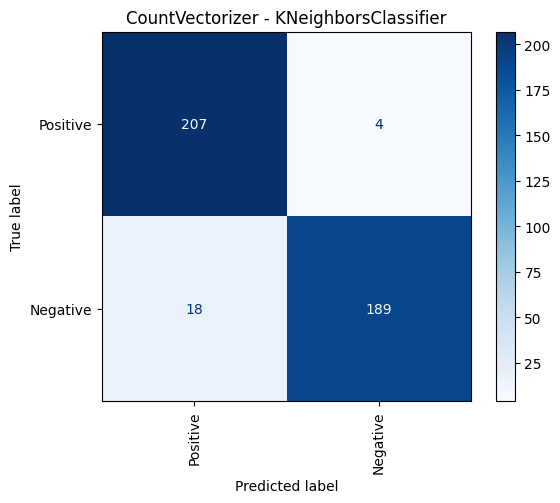

  Model: RandomForestClassifier
    Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
    Accuracy: 0.9641


<Figure size 1000x800 with 0 Axes>

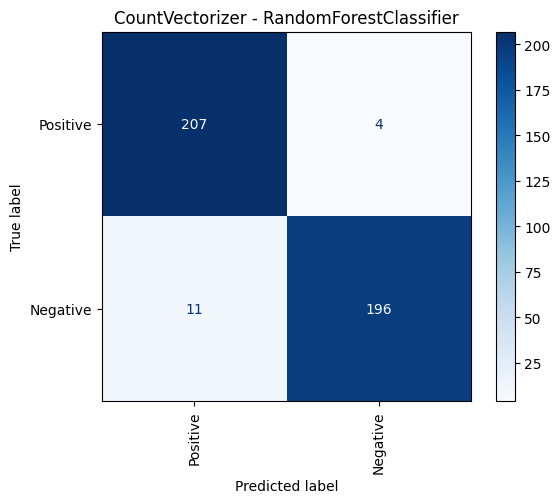

  Model: XGBClassifier
    Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
    Accuracy: 0.9593


<Figure size 1000x800 with 0 Axes>

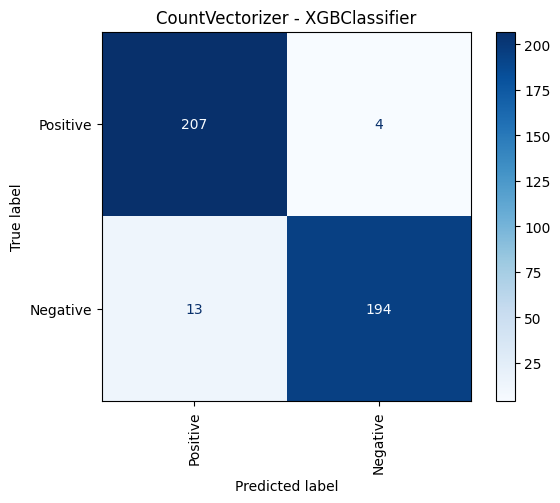

  Model: SVC
    Best parameters: {'C': 10, 'kernel': 'rbf'}
    Accuracy: 0.9569


<Figure size 1000x800 with 0 Axes>

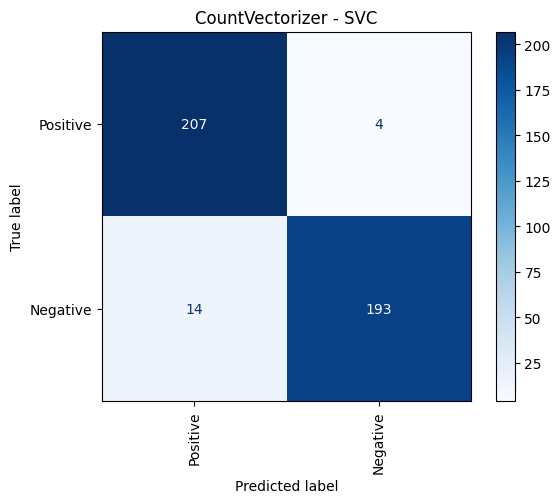

  Model: BernoulliNB
    Best parameters: {'alpha': 1, 'force_alpha': True}
    Accuracy: 0.9426


<Figure size 1000x800 with 0 Axes>

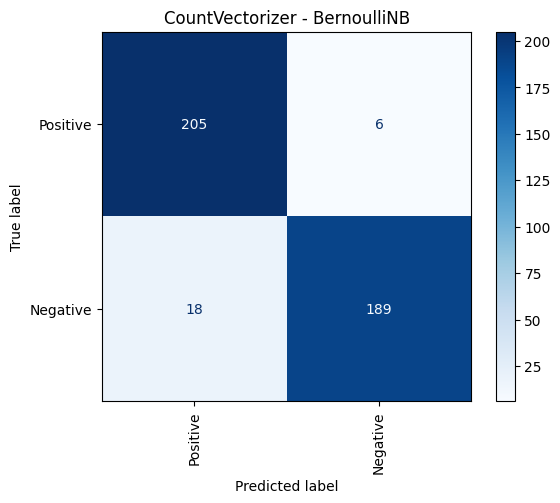


Vectorizer: HashingVectorizer
  Model: LogisticRegression
    Best parameters: {'C': 10}
    Accuracy: 0.9522


<Figure size 1000x800 with 0 Axes>

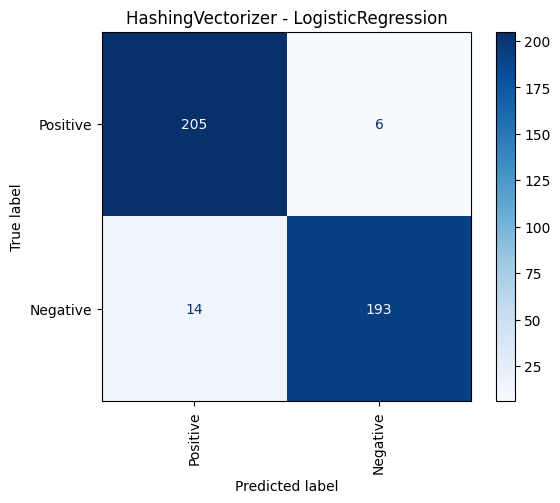

  Model: KNeighborsClassifier
    Best parameters: {'n_neighbors': 9, 'weights': 'uniform'}
    Accuracy: 0.9545


<Figure size 1000x800 with 0 Axes>

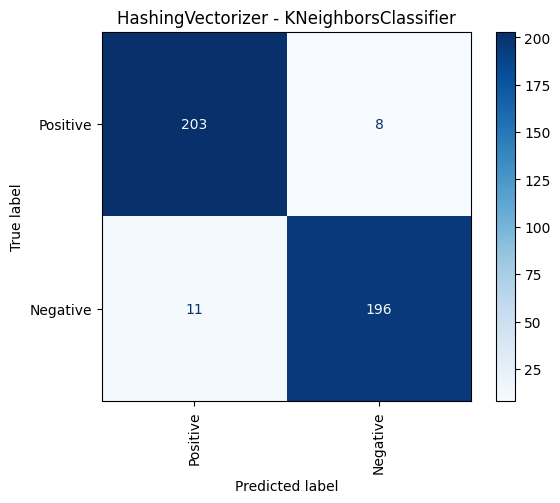

  Model: RandomForestClassifier
    Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
    Accuracy: 0.9713


<Figure size 1000x800 with 0 Axes>

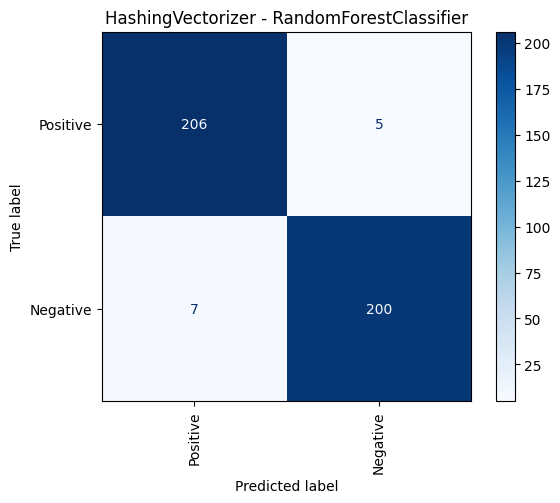

  Model: XGBClassifier
    Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
    Accuracy: 0.9713


<Figure size 1000x800 with 0 Axes>

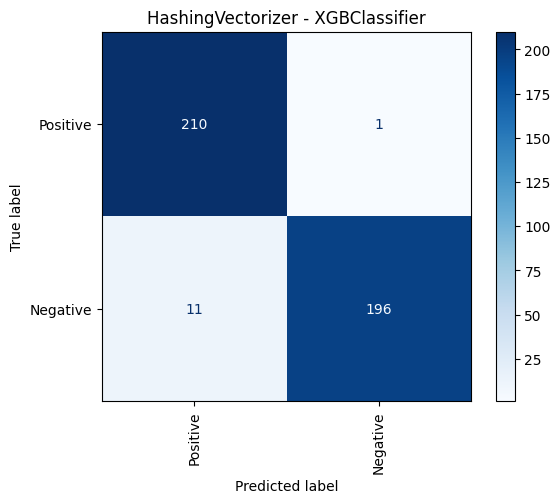

  Model: SVC
    Best parameters: {'C': 10, 'kernel': 'rbf'}
    Accuracy: 0.9713


<Figure size 1000x800 with 0 Axes>

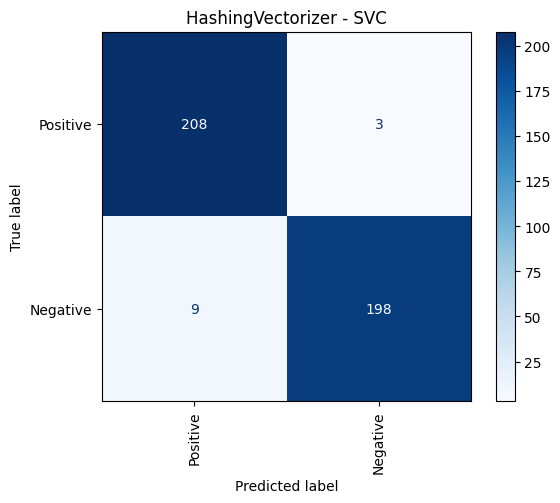

  Model: BernoulliNB
    Best parameters: {'alpha': 1, 'force_alpha': True}
    Accuracy: 0.8349


<Figure size 1000x800 with 0 Axes>

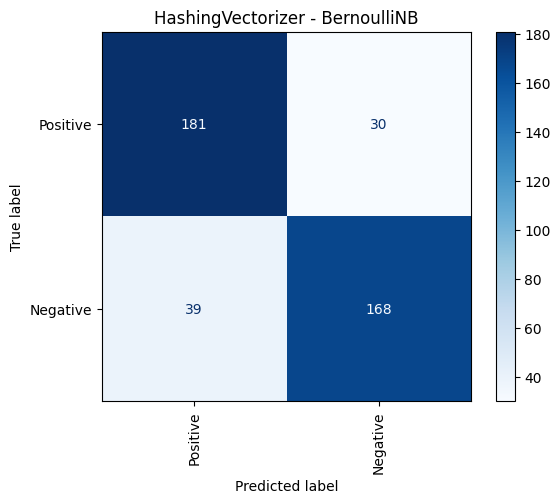


Vectorizer: TfidfVectorizer
  Model: LogisticRegression
    Best parameters: {'C': 0.1}
    Accuracy: 0.9545


<Figure size 1000x800 with 0 Axes>

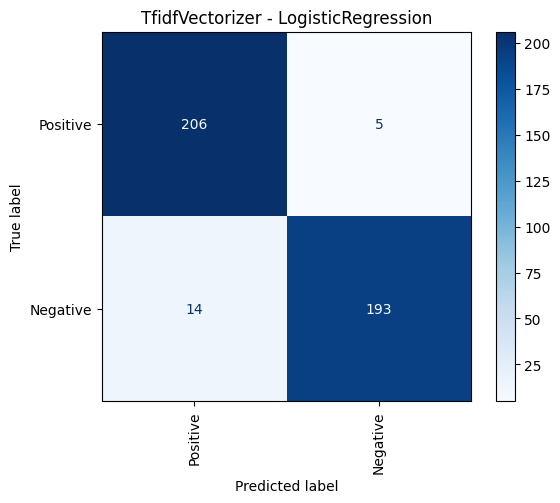

  Model: KNeighborsClassifier
    Best parameters: {'n_neighbors': 5, 'weights': 'distance'}
    Accuracy: 0.9330


<Figure size 1000x800 with 0 Axes>

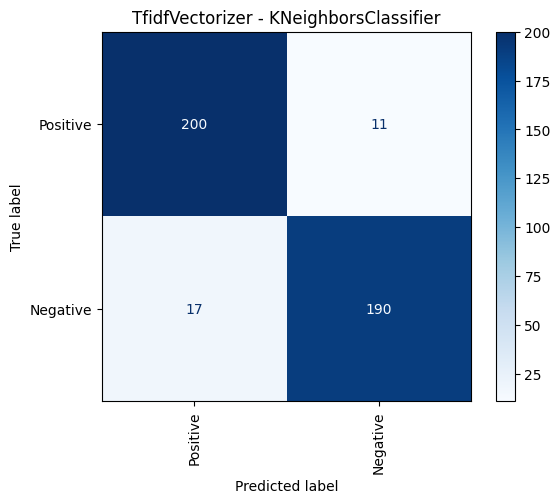

  Model: RandomForestClassifier
    Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
    Accuracy: 0.9713


<Figure size 1000x800 with 0 Axes>

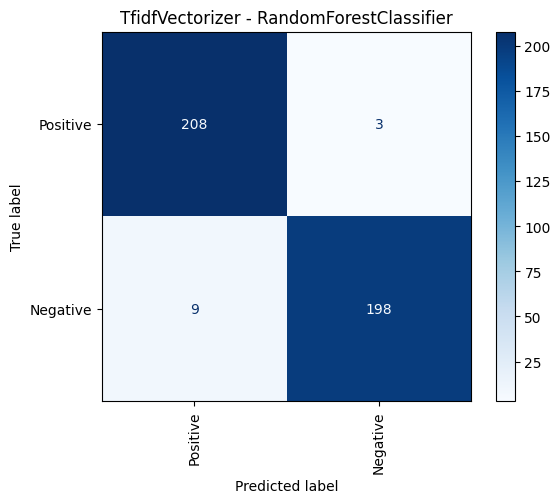

  Model: XGBClassifier
    Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
    Accuracy: 0.9713


<Figure size 1000x800 with 0 Axes>

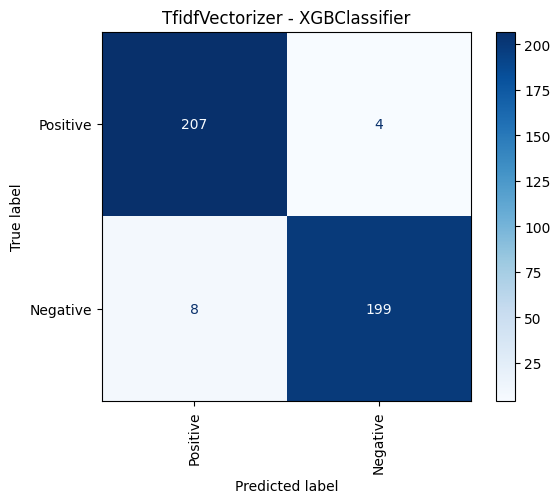

  Model: SVC
    Best parameters: {'C': 0.1, 'kernel': 'rbf'}
    Accuracy: 0.9593


<Figure size 1000x800 with 0 Axes>

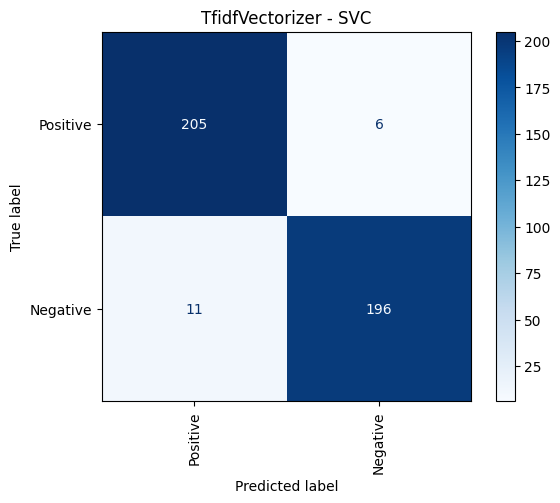

  Model: BernoulliNB
    Best parameters: {'alpha': 1, 'force_alpha': True}
    Accuracy: 0.9402


<Figure size 1000x800 with 0 Axes>

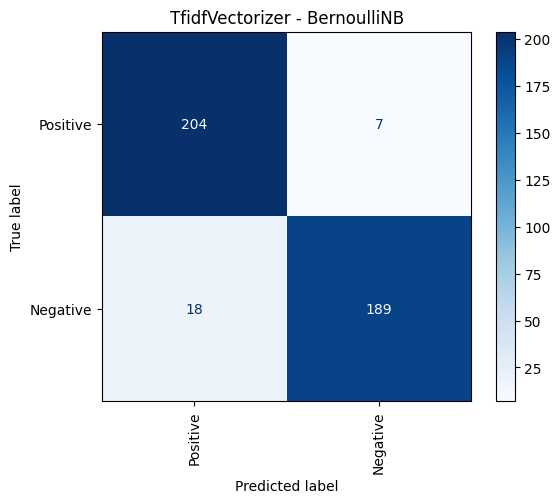


Best overall combination:
Vectorizer: HashingVectorizer
Model: RandomForestClassifier
Accuracy: 0.9713
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt

# The vecotizers
vectorizers = {
    'CountVectorizer': CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20),
    'HashingVectorizer': HashingVectorizer(ngram_range=(1, 2), n_features=200),
    'TfidfVectorizer': TfidfVectorizer(min_df=20, norm='l2', smooth_idf=True, use_idf=True, ngram_range=(1, 1), stop_words='english')
}

# The models and the parameters
models = {
    'LogisticRegression': (LogisticRegression(max_iter=1000, random_state=0),
                           {'C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    'KNeighborsClassifier': (KNeighborsClassifier(),
                             {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}),
    'RandomForestClassifier': (RandomForestClassifier(random_state=0),
                               {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30],
                                'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    'XGBClassifier': (XGBClassifier(),
                      {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]}),
    'SVC': (SVC(probability=True),
            {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10]}),
    'BernoulliNB': (BernoulliNB(),
                    {'alpha': [0.1, 0.5, 1], 'force_alpha': [True, False]})
}

# Split the data - 80% Train, 20% Test
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Results dictionary
results = {}

# For loop vectorizers and models
for vectorizer_name, vectorizer in vectorizers.items():
    print(f"\nVectorizer: {vectorizer_name}")

    # Vectorize the data
    x_train_vectorized = vectorizer.fit_transform(x_train)
    x_test_vectorized = vectorizer.transform(x_test)

    for model_name, (model, param_grid) in models.items():
        print(f"  Model: {model_name}")

        # Perform GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(x_train_vectorized, y_train)

        # Get best model and make predictions
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(x_test_vectorized)

        # Accuracy calculation
        accuracy = accuracy_score(y_test, y_pred)
        print(f"    Best parameters: {grid_search.best_params_}")
        print(f"    Accuracy: {accuracy:.4f}")

        # Store results
        results[(vectorizer_name, model_name)] = {
            'best_params': grid_search.best_params_,
            'accuracy': accuracy,
            'model': best_model
        }

        # Plot confusion matrix
        plt.figure(figsize=(10, 8))
        ConfusionMatrixDisplay.from_estimator(
            best_model,
            x_test_vectorized,
            y_test,
            display_labels=['Positive', 'Negative'],
            cmap='Blues',
            xticks_rotation='vertical'
        )
        plt.title(f"{vectorizer_name} - {model_name}")
        plt.show()

# Find best overall combination
best_combination = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest overall combination:")
print(f"Vectorizer: {best_combination[0]}")
print(f"Model: {best_combination[1]}")
print(f"Accuracy: {results[best_combination]['accuracy']:.4f}")
print(f"Best parameters: {results[best_combination]['best_params']}")

From the code above, i can see that the best performance is an accuracy of 0,9713. The models that achive this accuracy are:
**Hashing vectorizer**: Random forest classifier, SVC , XGClassifier and
**Tfid vectorizer**: Random forest classifier, XGBclassifier

In [17]:
results

{('CountVectorizer', 'LogisticRegression'): {'best_params': {'C': 1},
  'accuracy': 0.937799043062201,
  'model': LogisticRegression(C=1, max_iter=1000, random_state=0)},
 ('CountVectorizer',
  'KNeighborsClassifier'): {'best_params': {'n_neighbors': 5,
   'weights': 'uniform'}, 'accuracy': 0.9473684210526315, 'model': KNeighborsClassifier()},
 ('CountVectorizer',
  'RandomForestClassifier'): {'best_params': {'max_depth': None,
   'min_samples_leaf': 1,
   'min_samples_split': 10,
   'n_estimators': 200}, 'accuracy': 0.9641148325358851, 'model': RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=0)},
 ('CountVectorizer',
  'XGBClassifier'): {'best_params': {'learning_rate': 0.2,
   'max_depth': 3,
   'n_estimators': 300}, 'accuracy': 0.9593301435406698, 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None

To double check on the values i go through the results to double check and i see that all get the ones that had an accuracy of 0,9713 had the same value of "0.9712918660287081" which means that these 5 model combinations are the best.